<a href="https://colab.research.google.com/github/jerinSabrina/PCA_imageCompression/blob/main/PCA_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Import the necessary libraries in Python

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA


#**Reading the Original Image**


In [4]:
# Load the image and convert to grayscale
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img_data = np.array(img)
    return img_data, img


# **Computing PCA for Input**

In [5]:
# Function to perform PCA on the image data

def apply_pca(img_data, n_components):
    # Flatten the 2D image data into a 1D array to apply PCA
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(img_data)
    explained_variance = pca.explained_variance_ratio_
    return transformed_data, pca, explained_variance


# **Reconstruction of the Image as reduced number of compomnents**


In [6]:
# Reconstruct the image using inverse PCA
def reconstruct_image(pca, transformed_data):
    reconstructed_data = pca.inverse_transform(transformed_data)
    return np.uint8(reconstructed_data)


In [7]:

# Display original and reconstructed images
def display_images(original_img, reconstructed_img, explained_variance):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Original Image
    ax[0].imshow(original_img, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    # Reconstructed Image
    ax[1].imshow(reconstructed_img, cmap='gray')
    ax[1].set_title(f"Reconstructed Image\nVariance: {sum(explained_variance):.2f}")
    ax[1].axis('off')

    plt.show()


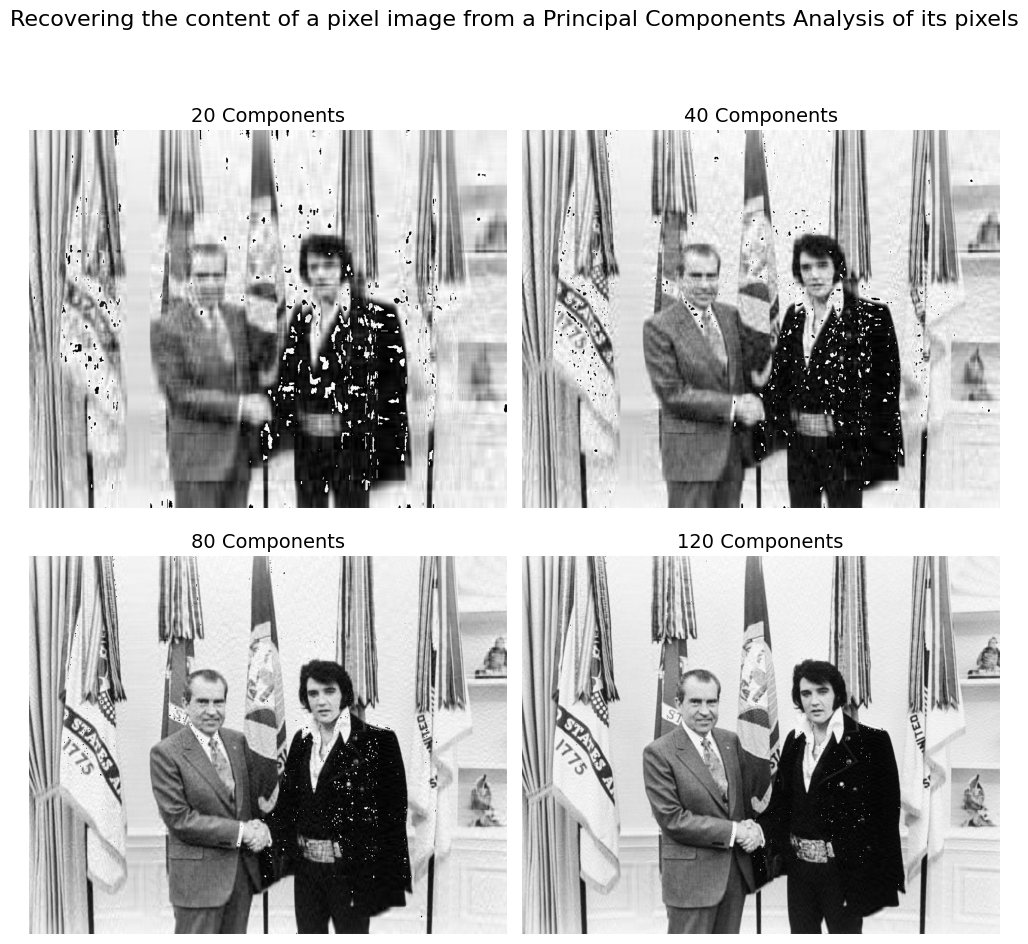

In [11]:
# Modified function to display the grid of images similar to the uploaded example
def display_pca_grid(original_img, img_data, component_values):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle("Recovering the content of a pixel image from a Principal Components Analysis of its pixels", fontsize=16)

    # Apply PCA for each component value and display the reconstructed images in a grid
    for i, n_components in enumerate(component_values):
        transformed_data, pca, explained_variance = apply_pca(img_data, n_components)
        reconstructed_img = reconstruct_image(pca, transformed_data)

        row, col = divmod(i, 2)
        ax[row, col].imshow(reconstructed_img, cmap='gray')
        ax[row, col].set_title(f"{n_components} Components", fontsize=14)
        ax[row, col].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the title
    plt.show()

# Component values to match the example
component_values = [20, 40, 80, 120]

# Display the grid of reconstructed images
display_pca_grid(original_img, img_data, component_values)


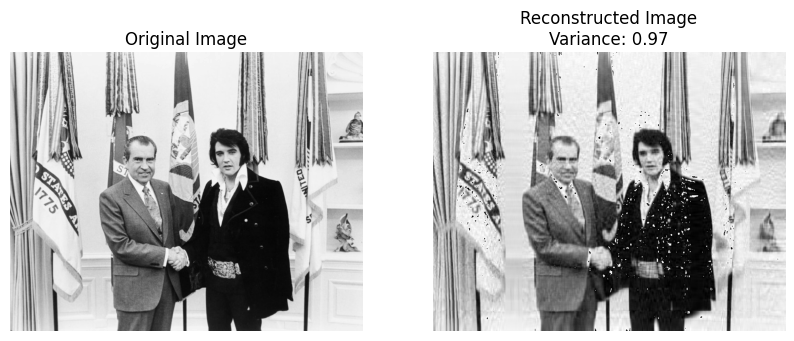

In [8]:

# Main execution
image_path = '/content/elvis-nixon.jpeg'  # Provide path to the image file
n_components = 50  # Define the number of PCA components

# Load and preprocess the image
img_data, original_img = load_and_preprocess_image(image_path)

# Apply PCA for image compression
transformed_data, pca, explained_variance = apply_pca(img_data, n_components)

# Reconstruct the image using PCA components
reconstructed_img = reconstruct_image(pca, transformed_data)

# Display the original and the reconstructed image
display_images(original_img, reconstructed_img, explained_variance)
